In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)

In [115]:
#Helper Functions
def _printHelper(heading, msg):
    print("=============================================")
    print(heading + "\n")
    print(msg)
    print("=============================================")
    
def printError(error):
    _printHelper("ERROR", error)
    
def printHeading(heading):
    print()
    print("=============================================")
    print(heading)
    print("=============================================")
    print()

In [116]:
#Making CSV into pandas.dataframe object
df = pd.read_csv("phishing_data.csv")

In [117]:
#Printing out the different columns
printHeading("Column Names")
print(df.columns)

printHeading("Number of Columns")
print(len(df.columns))


Column Names

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statis

In [118]:
#Printing out first 10 rows of data
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,6,3,2,3,2,12,12,5,5.000000,7.5,3.750000,0,0,0,0,0,0,143,0.930070,0.069930,0,1,0,0.000000,0,0.000000,0,1,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0,0,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,10,6,2,2,0,35,35,0,10.700000,10.7,0.000000,2,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,5,5,3,3,3,17,17,9,7.400000,10.0,5.666667,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,2,3,3,3,0,5,5,0,4.000000,4.0,0.000000,0,0,0,0,0,0,404,0.962871,0.037129,0,0,0,0.133333,0,0.000000,0,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0,0,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,11,11,0,7.000000,7.0,0.000000,0,0,0,0,0,0,57,0.684211,0.315789,0,3,0,0.000000,0,0.000000,0,1,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0,0,0,zero,0,164,1662,312044,0,0,4,legitimate
5,https://support-appleld.com.secureupdate.duila...,128,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.117188,0.000000,0,0,0,1,0,3,1,0,0,0,0,0,13,4,2,3,2,17,13,17,7.769231,8.4,7.375000,0,0,0,0,0,0,51,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.000000,0.000000,0,0,0,100.000000,0,0,0,1,one,0,25,3993,5707171,0,1,0,phishing
6,https://www.authpro.com/auth/ubabankng/?action...,50,15,0,2,0,0,1,0,0,1,0,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,6,3,3,3,3,9,7,9,5.333333,5.0,5.500000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,0,705,7330,154708,0,0,4,phishing
7,http://littlee.com.au/alibaba/login.alibaba.co...,51,14,0,5,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,1,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,6,2,3,7,3,7,7,7,5.333333,7.0,5.000000,3,0,0,1,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,zero,1,0,-1,0,0,1,0,phishing
8,http://www.tutorialspoint.com/dbms/,35,22,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,1,0,0,0,3,3,3,3,4

### Object to Int64 or Float64 data types

Converting all Strings to Integers in some form in order to work with it easier and normalize 

### Y- Column to 1s and 0s

Setting the status column with `phishing` being 1 and `legitimate` being 0

In [119]:
#Status Column to Integers
for i,e in enumerate(df["status"]):
    
    if (e == "phishing"):
        df['status'][i] = 1
    elif (e == "legitimate"):
        df['status'][i] = 0
    
df['status'] = pd.to_numeric(df['status'])

### Cleaning up all Features that count the number of (feature)

Making sure all the elements inside this column are **integers**

In [120]:
def cleanUpOneZero(colLst, columnName):
    if (df[columnName].isnull().values.any()):
        printError("There are some null values")
        
    for index,element in enumerate(df[columnName]):
        if (type(element) != int):
            try:
                int(element)
            except:
                if (element == "zero" or element =="Zero"):
                    df[columnName].iat[index] = 0
                elif (element == "one" or element == "One"):
                    df[columnName].iat[index] = 1                    
                else:
                    print()
                    print("For Column:")
                    print("============\n")
                    printError('Never account for the number "' + str(element) + '"')
                    print()
                    break
                
    try:
        df[columnName] = pd.to_numeric(df[columnName])
    except:
        print()
        print("For Column:")
        print("============\n")
        printError("Failed to convert column (" + columnName + ") to integers")
        print()

    if (len(df[columnName].value_counts()) != 2 and len(df[columnName].value_counts()) != 1):
        return
        
    if  (len(df[df[columnName] > 0]) < 500 or len(df[df[columnName]== 0]) < 500):
        del df[columnName]
        print()
        print("Deleting " + columnName + " as there is only one number for the feature")
        print("(i.e.) There is only one value for all the records")
        print()
        colLst.remove(columnName)


In [121]:
colLst = ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank']

for feature in colLst:
    print(feature)
    cleanUpOneZero(colLst,feature)

length_url
length_hostname
ip
nb_dots
nb_hyphens
nb_at
nb_qm
nb_and
nb_or

Deleting nb_or as there is only one number for the feature
(i.e.) There is only one value for all the records

nb_underscore
nb_tilde

Deleting nb_tilde as there is only one number for the feature
(i.e.) There is only one value for all the records

nb_slash
nb_star

Deleting nb_star as there is only one number for the feature
(i.e.) There is only one value for all the records

nb_comma
nb_semicolumn
nb_dollar
nb_space
nb_www
nb_com
nb_dslash

Deleting nb_dslash as there is only one number for the feature
(i.e.) There is only one value for all the records

https_token
ratio_digits_url
ratio_digits_host
punycode

Deleting punycode as there is only one number for the feature
(i.e.) There is only one value for all the records

tld_in_path
tld_in_subdomain
abnormal_subdomain

Deleting abnormal_subdomain as there is only one number for the feature
(i.e.) There is only one value for all the records

prefix_suffix
rando

## Normalization

Normalizing the data before getting the covariance

In [122]:
statusColumn = df['status']
del df['status']
urlColumn = df['url']
del df['url']

df = (df-df.mean())/(df.std())

df['status'] = statusColumn
df['url'] = urlColumn

### Getting the Covariance between each Feature and Status (Answer)

So we can see if we can delete the features that we don't understand if it doesn't have a big impact on the predictions.


In [123]:
# def getCoviranceVector(df):
#     yColName = "length_hostname"
#     yMean = np.mean(df[yColName])

#     colSize = len(df[yColName])

#     covLst = []
#     xLst = []



#     for i, colName in enumerate(df):

#         if (i == len(df.columns) - 1):
#             #Phishing Column, break
#             break

#         #Making sure column is an integer
#         colType = df[colName].dtypes

#         if (colType != np.int64 and colType != np.float64):
#             print("Breaking at: " + colName + ", with type: " + str(colType))
#             continue

#         #Adding Column names for dataframe
#         xLst.append(colName) 

#         xMean = np.mean(df[colName])


#         fsum = 0.0

#         #Do Covariance Calculation
#         for i,x in enumerate(df[colName]):
#             y = df[yColName][i]

#             fsum += ((x - xMean)*(y - yMean))

#         fsum /= (colSize - 1) 

#         covLst.append(fsum)


#     covDf = pd.DataFrame(covLst)

#     covDf.columns = [yColName]
#     covDf.index = xLst
    
#     return covDf

covDf = pd.DataFrame.cov(df)
del covDf['status']['status']
covDf = covDf['status']
covDf.head(100)

print(covDf)

length_url                    0.122758
length_hostname               0.124186
ip                            0.159140
nb_dots                       0.100476
nb_hyphens                   -0.048708
nb_at                         0.071036
nb_qm                         0.146679
nb_and                        0.086875
nb_eq                         0.117088
nb_underscore                 0.020014
nb_percent                    0.012007
nb_slash                      0.119932
nb_colon                      0.047183
nb_comma                      0.003202
nb_semicolumn                 0.052508
nb_dollar                     0.010705
nb_space                     -0.002481
nb_www                       -0.221905
nb_com                        0.079576
http_in_path                  0.036356
https_token                   0.055458
ratio_digits_url              0.178212
ratio_digits_host             0.112384
port                          0.005719
tld_in_path                   0.046814
tld_in_subdomain         

### Plot

Plot of covariances with each feature to `status` to see if `phishing` is 1 or 0

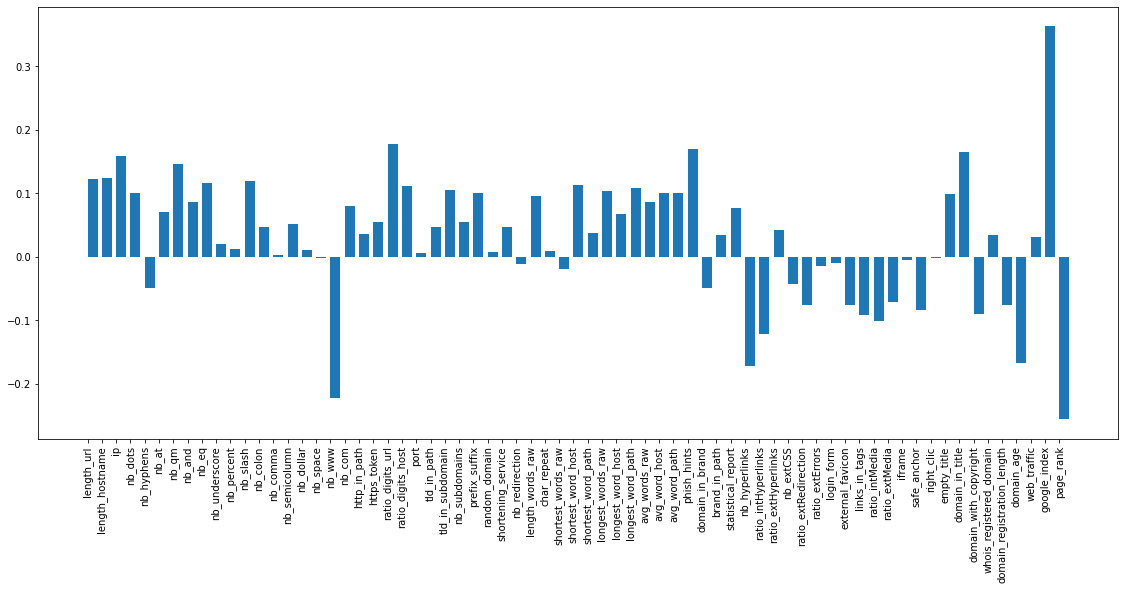

In [124]:
fig = plt.figure(figsize=(15, 6)) # the figsize changes the width and height respectively
ax = fig.add_axes([0,0,1,1])
langs = covDf.index
students = covDf
ax.bar(langs,students, align='edge', width=0.7) #width determines width of bars
plt.xticks(rotation = 90) 
plt.show()

### Deletes

Deleting Certain Columns with explanation of why we doing so


In [125]:
#Deleting Columns

# del df['path_extension']